In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Euler method

In [12]:
def Euler(f, x0, t0 = 0.0, tFin = 10.0, params = None, h = 0.01):
    y = np.zeros(shape=(len(x0), 1))
    k = np.zeros(shape=(len(x0)))
    y[:, 0] = x0
    t = t0
    timeArray = np.array([])
    while t < tFin:
        timeArray = np.append(timeArray, t)
        k = f(x0, t, params)
        x0 = x0 + h * k
        t = t + h
        y = np.column_stack((y, x0))
    timeArray = np.append(timeArray, t)
    return y, timeArray

# RK2 method

In [13]:
def RK2(f, x0, t0 = 0.0, tFin = 10.0, params = None, h = 0.01):
    y = np.zeros(shape=(len(x0), 1))
    k1 = k2 = np.zeros(shape=(len(x0)))
    y[:, 0] = x0
    t = t0
    timeArray = np.array([])
    while t < tFin:
        timeArray = np.append(timeArray, t)
        k1 = f(x0, t, params)
        k2 = f(x0 + h*k1, t + h, params)
        x0 = x0 + h * (k1 + k2)/2.0
        t = t + h
        y = np.column_stack((y, x0))
    timeArray = np.append(timeArray, t)
    return y, timeArray

# RK4 method

In [14]:
def RK4(f, x0, t0 = 0.0, tFin = 10.0, params=None, h = 0.01):
    y = np.zeros(shape=(len(x0), 1))
    k1 = k2 = k3 = k4 = np.zeros(shape=(len(x0)))
    y[:, 0] = x0
    t = t0
    timeArray = np.array([])
    while t < tFin:
        timeArray = np.append(timeArray, t)
        k1 = f(x0, t, params)
        k2 = f(x0 + h*k1/2.0, t + h/2.0, params)
        k3 = f(x0 + h*k2/2.0, t + h/2.0, params)
        k4 = f(x0 + h*k3, t + h, params)
        x0 = x0 + h/6.0 * (k1 + 2.0*k2 + 2.0*k3 + k4)
        t = t + h
        y = np.column_stack((y, x0))
    timeArray = np.append(timeArray, t)
    return y, timeArray

# Example: Simple pendulum

In [24]:
def pendulum(x0, t, params):
    g, m, l = params
    theta, vtheta = x0
    dvtheta = -g/l * np.sin(theta)
    return np.array([vtheta, dvtheta])


y1, t1 = Euler(pendulum, x0 = np.array([0, 0.1]),params=(9.8, 1.0, 1.0))
y2, t2 = RK2(pendulum, x0 = np.array([0, 0.1]),params=(9.8, 1.0, 1.0))
y3, t3 = RK4(pendulum, x0 = np.array([0, 0.1]),params=(9.8, 1.0, 1.0))

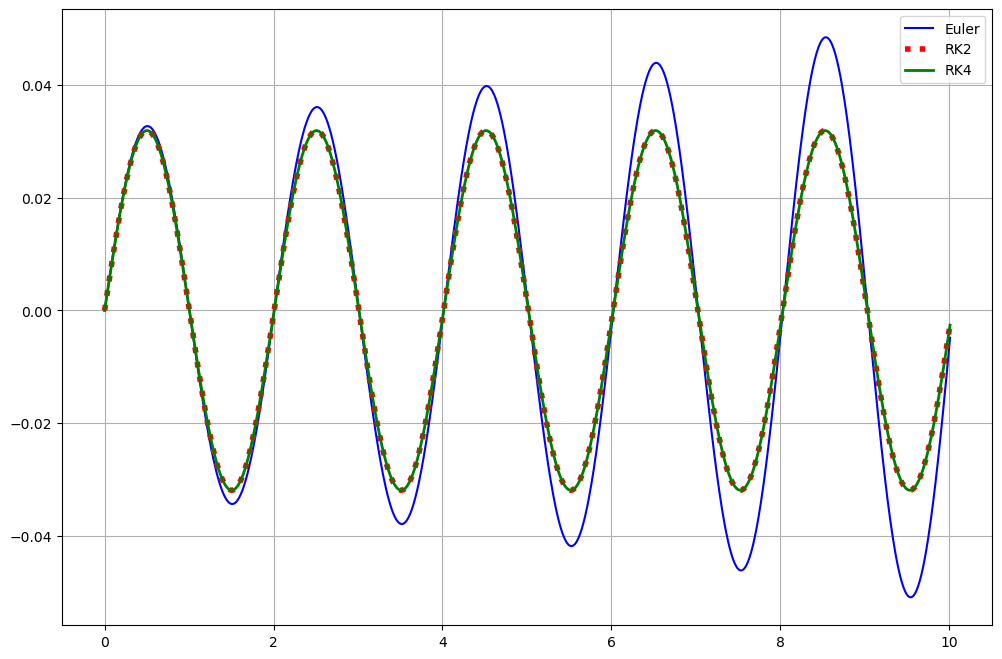

In [34]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(t1, y1[0], label="Euler", color="blue")
ax.plot(t2, y2[0], label="RK2", color="red", linewidth=4, linestyle="dotted")
ax.plot(t3, y3[0], label="RK4",color="green", linewidth=2)
ax.legend()
ax.grid()

plt.show()